## Cluster Analysis
<hr>

### Agenda
1. Introduction to Unsupervised Learning
2. Clustering
3. Similarity or Distance Calculation
4. Clustering as an Optimization Function
5. Types of Clustering Methods
6. Partitioning Clustering - KMeans & Meanshift
7. Hierarchial Clustering - Agglomerative
8. Density Based Clustering - DBSCAN
9. Measuring Performance of Clusters
10. Comparing all clustering methods

<hr>

### 1. Introduction to Unsupervised Learning
* Unsupervised Learning is a type of Machine learning to draw inferences from unlabelled datasets.
* Model tries to find relationship between data.
* Most common unsupervised learning method is clustering which is used for exploratory data analysis to find hidden patterns or grouping in data

### 2. Clustering
* A learning technique to group a set of objects in such a way that objects of same group are more similar to each other than from objects of other group.
* Applications of clustering are as follows
  - Automatically organizing the data
  - Labeling data
  - Understanding hidden structure of data
  - News Cloustering for grouping similar news together
  - Customer Segmentation
  - Suggest social groups

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import make_blobs

* Generating natural cluster

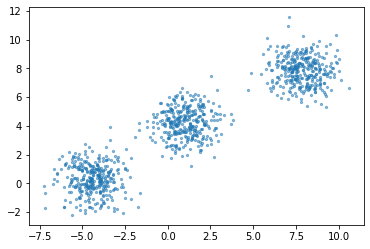

In [ ]:
X,y = make_blobs(n_features=2, n_samples=1000, centers=3, cluster_std=1, random_state=3)
plt.scatter(X[:,0], X[:,1], s=5, alpha=.5)

### 3. Distance or Similarity Function
* Data belonging to same cluster are similar & data belonging to different cluster are different. 
* We need mechanisms to measure similarity & differences between data. 
* This can be achieved using any of the below techniques.

 - Minkowiski breed of distance calculation: 
 
 <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/4060cc840aeab9e41b5e47356088889e2e7a6f0f">
 
 - Manhatten (p=1), Euclidian (p=2)
 
 - Cosine: Suited for text data
 
 <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/1d94e5903f7936d3c131e040ef2c51b473dd071d"> 

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances,cosine_distances,manhattan_distances

In [ ]:
X = [[0, 1], [1, 1]]

In [ ]:
euclidean_distances(X, X)

array([[0., 1.],
       [1., 0.]])

In [ ]:
euclidean_distances(X, [[0,0]])

array([[1.        ],
       [1.41421356]])

In [ ]:
cosine_distances(X,X)

array([[0.        , 0.29289322],
       [0.29289322, 0.        ]])

In [ ]:
manhattan_distances(X,X)

array([[0., 1.],
       [1., 0.]])

### 4. Clustering as an Optimization Problem
* Maximize inter-cluster distances
* Minimize intra-cluster distances

### 5. Types of Clustering
* Partitioning methods
  - Partitions n data into k partitions
  - Initially, random partitions are created & gradually data is moved across different partitions.
  - It uses distance between points to optimize clusters.
  - KMeans & Meanshift are examples of Partitioning methods
* Hierarchical methods
  - These methods does hierarchical decomposition of datasets.
  - One approach is, assume each data as cluster & merge to create a bigger cluster
  - Another approach is start with one cluster & continue splitting
* Density-based methods
  - All above techniques are distance based & such methods can find only spherical clusters and not suited for clusters of other shapes.
  - Continue growing the cluster untill the density exceeds certain threashold.

### 6. Partitioning Method
#### KMeans
* Minimizing creteria : within-cluster-sum-of-squares.

<img src="https://github.com/awantik/machine-learning-slides/blob/master/kmeans2.png?raw=true">

* The centroids are chosen in such a way that it minimizes within cluster sum of squares.

* The k-means algorithm divides a set of $N$ samples $X$ into $K$ disjoint clusters $C$, each described by the mean  of the samples in the cluster. $\mu$

<img src="https://cssanalytics.files.wordpress.com/2013/11/cluster-image.png" width="300px">

##### KMeans Algorithm
1. Initialize k centroids.
2. Assign each data to the nearest centroid, these step will create clusters.
3. Recalculate centroid - which is mean of all data belonging to same cluster.
4. Repeat steps 2 & 3, till there is no data to reassign a different centroid.

Animation to explain algo - http://tech.nitoyon.com/en/blog/2013/11/07/k-means/

In [ ]:
from sklearn.datasets import make_blobs, make_moons

In [ ]:
X,y = make_blobs(n_features=2, n_samples=1000, cluster_std=.5)

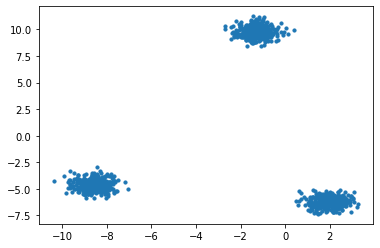

In [ ]:
plt.scatter(X[:,0], X[:,1],s=10)

In [ ]:
from sklearn.cluster import KMeans, MeanShift

In [ ]:
kmeans = KMeans(n_clusters=3)

In [ ]:
kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

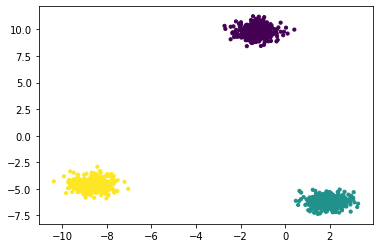

In [ ]:
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X))

In [ ]:
X, y = make_moons(n_samples=1000, noise=.09)

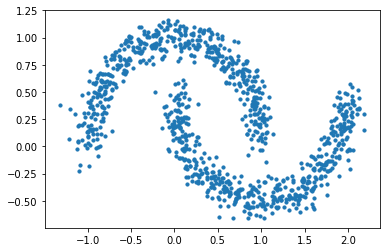

In [ ]:
plt.scatter(X[:,0], X[:,1],s=10)

In [ ]:
kmeans = KMeans(n_clusters=2)

In [ ]:
kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

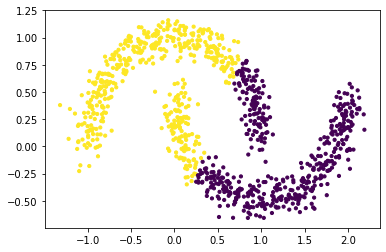

In [ ]:
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X))

#### Limitations of KMeans
* Assumes that clusters are convex & behaves poorly for elongated clusters.
* Probability for participation of data to multiple clusters.
* KMeans tries to find local minima & this depends on init value.

#### Meanshift
* Centroid based clustering algorithm.
* Mode can be understood as highest density of data points.

In [ ]:
kmeans = KMeans(n_clusters=4)

In [ ]:
centers = [[1, 1], [-.75, -1], [1, -1], [-3, 2]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

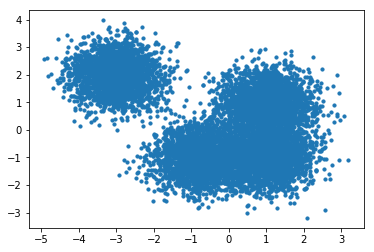

In [ ]:
plt.scatter(X[:,0], X[:,1],s=10)

In [ ]:
kmeans = KMeans(n_clusters=4)

In [ ]:
ms = MeanShift()

In [ ]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [ ]:
ms.fit(X)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=None, seeds=None)

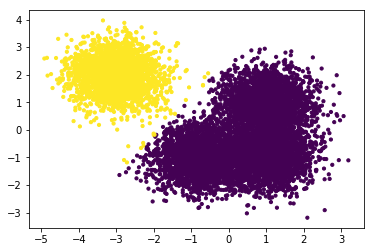

In [ ]:
plt.scatter(X[:,0], X[:,1],s=10, c=ms.predict(X))

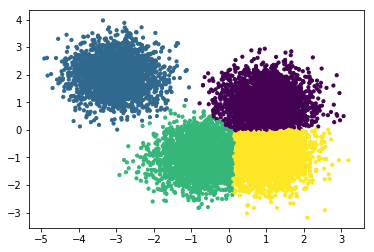

In [ ]:
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X))

### 7. Hierarchial Clustering
* A method of clustering where you combine similar clusters to create a cluster or split a cluster into smaller clusters such they now they become better.
* Two types of hierarchaial Clustering
  - Agglomerative method, a botton-up approach.
  - Divisive method, a top-down approach.

#### Agglomerative method
* Start with assigning one cluster to each data. 
* Combine clusters which have higher similarity.
* Differences between methods arise due to different ways of defining distance (or similarity) between clusters. The following sections describe several agglomerative techniques in detail.
  - Single Linkage Clustering
  - Complete linkage clustering
  - Average linkage clustering
  - Average group linkage

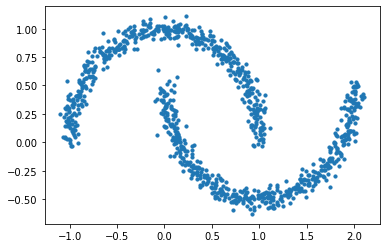

In [ ]:
X, y = make_moons(n_samples=1000, noise=.05)
plt.scatter(X[:,0], X[:,1],s=10)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
agc = AgglomerativeClustering(linkage='single')

In [ ]:
agc.fit(X)

AgglomerativeClustering(linkage='single')

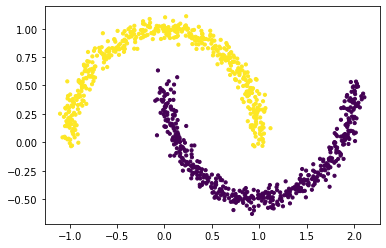

In [ ]:
plt.scatter(X[:,0], X[:,1],s=10,c=agc.labels_)

### 8. Density Based Clustering - DBSCAN
* 

In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

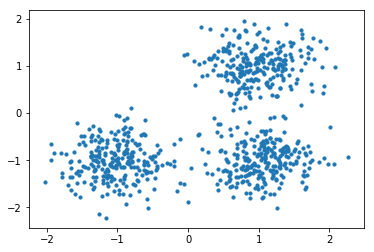

In [ ]:
plt.scatter(X[:,0], X[:,1],s=10)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

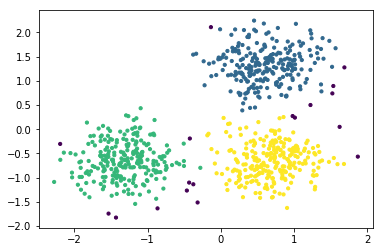

In [ ]:
plt.scatter(X[:,0], X[:,1],s=10,c=labels)

### 9. Measuring Performance of Clusters
* Two forms of evaluation 
* supervised, which uses a ground truth class values for each sample.
  - completeness_score
  - homogeneity_score
* unsupervised, which measures the quality of model itself
  - silhoutte_score
  - calinski_harabaz_score

##### completeness_score
- A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
- Accuracy is 1.0 if data belonging to same class belongs to same cluster, even if multiple classes belongs to same cluster

In [ ]:
from sklearn.metrics.cluster import completeness_score

In [ ]:
completeness_score( labels_true=[10,10,11,11],labels_pred=[1,1,0,0])

1.0

* The acuracy is 1.0 because all the data belonging to same class belongs to same cluster

In [ ]:
completeness_score( labels_true=[11,22,22,11],labels_pred=[1,0,1,1])

0.3836885465963443

* The accuracy is .3 because class 1 - [11,22,11], class 2 - [22]  

In [ ]:
print(completeness_score([10, 10, 11, 11], [0, 0, 0, 0]))

1.0


##### homogeneity_score
- A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

In [ ]:
from sklearn.metrics.cluster import homogeneity_score

In [ ]:
homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

In [ ]:
homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3])

0.9999999999999999

In [ ]:
homogeneity_score([0, 0, 0, 0], [1, 1, 0, 0])

1.0

* Same class data is broken into two clusters

#### silhoutte_score
* The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.
* The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

##### Example : Selecting the number of clusters with silhouette analysis on KMeans clustering

In [ ]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

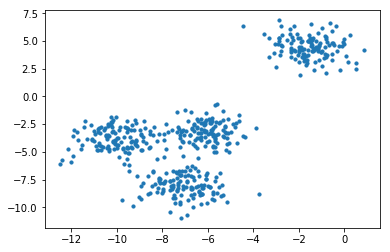

In [ ]:
plt.scatter(X[:,0],X[:,1],s=10)

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, silhouette_score(X,labels))

2 0.7049787496083262
3 0.5882004012129721
4 0.6505186632729437
5 0.5743946554642041
6 0.44289289433684664


* Optimal number of clusters seems to be 2

#### calinski_harabaz_score
* The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion.

In [ ]:
from sklearn.metrics import calinski_harabaz_score

for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, calinski_harabaz_score(X,labels))

2 1604.112286409658
3 1809.991966958033
4 2704.4858735121093
5 2263.560105507826
6 2035.4407309952178
